<a href="https://colab.research.google.com/github/ShreeyanshParihar/CropDiseaseDetection/blob/main/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Model
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
num_classes=38

In [6]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 0 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 11.77 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.


In [7]:
train_folder_path = '/content/PlantVillage-Dataset/raw/color'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    # Get the list of image file paths in the current class folder
    image_files = glob(class_folder + '/*.JPG')
    image_files2 = glob(class_folder + '/*.jpg')  # Update the extension based on your image format
    # Load and resize images
    for image_file in image_files:
        img = cv2.imread(image_file)
        img = cv2.resize(img, (32, 32))  # Adjust the size as needed
        images.append(img)
        labels.append(label)

    for image_file in image_files2:
        img = cv2.imread(image_file)
        img = cv2.resize(img, (32, 32))  # Adjust the size as needed
        images.append(img)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (54303, 32, 32, 3)
y_train shape: (54303,)


In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Label encoding
label_encoder = LabelEncoder()
labels1 = label_encoder.fit_transform(labels)

# One-hot encoding
labels = to_categorical(labels1,num_classes)

# Display the results
print("Integer Encoded Labels:", labels1)
print("One-Hot Encoded Labels:\n", labels)

Integer Encoded Labels: [15 15 15 ... 27 27 27]
One-Hot Encoded Labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test=train_test_split(x_temp, y_temp, test_size=0.5,random_state=0)

In [10]:
input_shape = images.shape[1:]
print(input_shape)

(32, 32, 3)


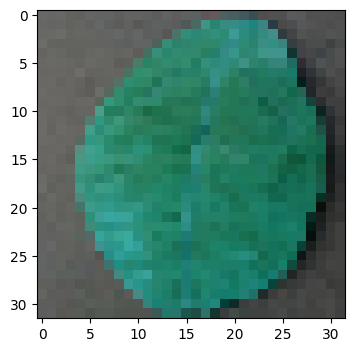

In [11]:
def show_data(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.show()

show_data(images[0])

In [15]:
# Load the ResNet-50 model
model = keras.applications.ResNet50V2(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32, 32, 3), pooling='avg', classes=38,
    classifier_activation="softmax",
)
batch=32
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Compile the model
model.compile(loss='categorical_crossentropy',
                 optimizer=Adam(learning_rate=0.001),
                 metrics=['accuracy'])



In [16]:
trained_model1 = model.fit(x_train, y_train,
    epochs=25,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 107s 49ms/step - accuracy: 0.4820 - loss: 1.9673 - val_accuracy: 0.6139 - val_loss: 2.1546
Epoch 2/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7095 - loss: 1.0191 - val_accuracy: 0.0390 - val_loss: 10.3968
Epoch 3/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.6532 - loss: 1.2629 - val_accuracy: 0.6091 - val_loss: 1.6721
Epoch 4/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8148 - loss: 0.5854 - val_accuracy: 0.6522 - val_loss: 1.3525
Epoch 5/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - accuracy: 0.8321 - loss: 0.5403 - val_accuracy: 0.5428 - val_loss: 1.7285
Epoch 6/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8605 - loss: 0.4159 - val_accuracy: 0.8045 - val_loss: 0.6118
Epoch 7/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.8720 - loss: 0.3947 - val_accuracy: 0.7587 - val_loss: 0.7893
Epoch 8/25
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8990

In [17]:
model.evaluate(x_test,y_test,verbose=1)

255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9395 - loss: 0.2059


[0.20622120797634125, 0.938988447189331]

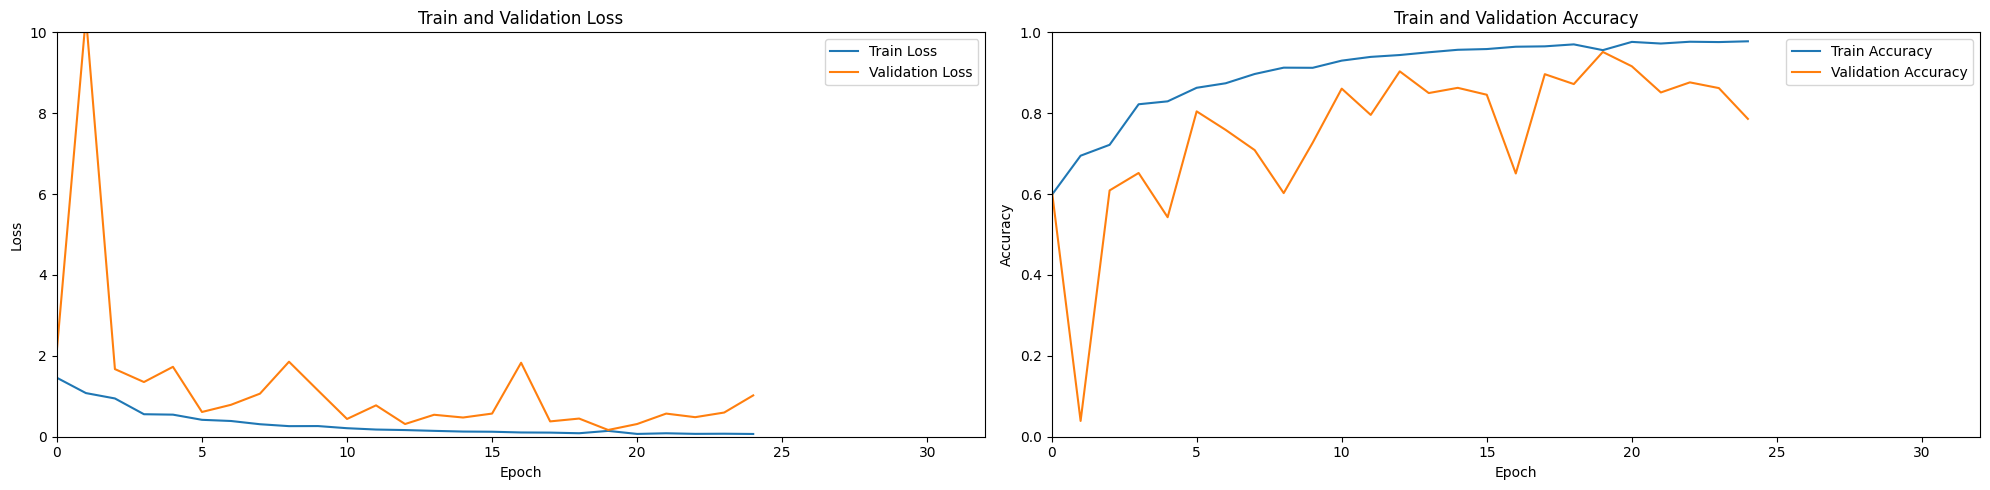

In [18]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model1.history['loss'],label="Train Loss")
plt.plot(trained_model1.history['val_loss'], label="Validation Loss")
plt.xlim(0,32)
plt.ylim(0,10)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model1.history['accuracy'], label="Train Accuracy")
plt.plot(trained_model1.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0,32)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

In [20]:
#Save the model to distribute and use for predict
model.save('plant_disease_model.keras')

In [24]:
# prompt: Load the model and predict response for an image

import tensorflow as tf
import numpy as np
import cv2

# Load the saved model
model = tf.keras.models.load_model('plant_disease_model.keras')

def predict_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img,(32, 32))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make the prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    return predicted_class, prediction


# Example usage:
image_path = '/content/PlantVillage-Dataset/raw/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG' # Replace with your image path
predicted_class, prediction_probabilities = predict_image(image_path)

print(f"Predicted class index: {predicted_class}")
print(f"Prediction probabilities: {prediction_probabilities}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class index: 1
Prediction probabilities: [[8.7161034e-09 9.9949706e-01 2.4091777e-09 9.4085597e-05 4.4311291e-06
  3.9678412e-07 5.7098896e-05 5.8827465e-13 3.2942136e-08 5.1191549e-13
  2.4206307e-11 2.3663967e-08 4.1641077e-09 1.1095229e-11 1.2427732e-10
  2.3332548e-05 4.4309978e-08 1.0766671e-11 1.7098406e-06 6.0923526e-07
  1.8120552e-08 3.4891707e-07 2.6061514e-08 1.5329190e-08 1.9549912e-04
  2.2133879e-10 8.7338599e-09 1.1272265e-09 6.2008341e-09 1.2360020e-04
  1.1564848e-06 5.0545870e-09 2.2445752e-07 2.9141645e-10 1.0749232e-07
  1.2061298e-07 1.2989668e-10 1.2795394e-12]]
